In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

# Reading the data 
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

/home/oscarm524/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Stacked Bar Chart

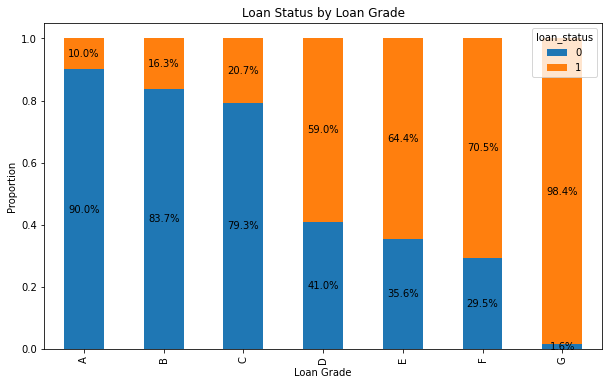

In [2]:
ax = df.groupby("loan_grade")["loan_status"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Loan Status by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Proportion")

# Annotating the percentages on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, '{:.1f}%'.format(height*100), ha='center', va='center')

# Side-by-Side Bar Chart

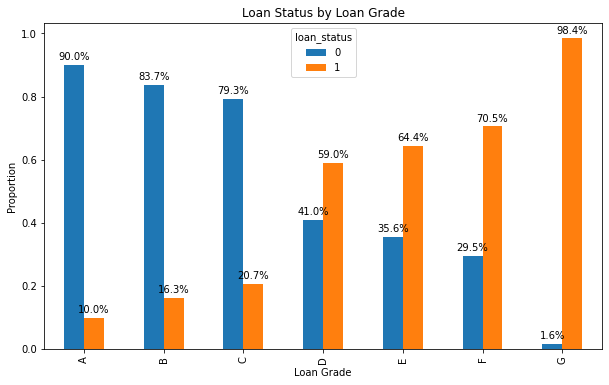

In [5]:
ax = df.groupby("loan_grade")["loan_status"].value_counts(normalize=True).unstack().plot(kind="bar", figsize=(10, 6))
plt.title("Loan Status by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Proportion")

# Annotating the percentages on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height + 0.01, '{:.1f}%'.format(height*100), ha='center', va='bottom')

# Heatmap with Matplotlib

In [6]:
import numpy as np

# Creating the crosstab data for the heatmap
crosstab = pd.crosstab(df['loan_grade'], df['loan_status'], normalize='index')
crosstab

loan_status,0,1
loan_grade,,
A,0.900436,0.099564
B,0.837240,0.162760
C,0.792660,0.207340
D,0.409542,0.590458
E,0.355809,0.644191
F,0.294606,0.705394
G,0.015625,0.984375


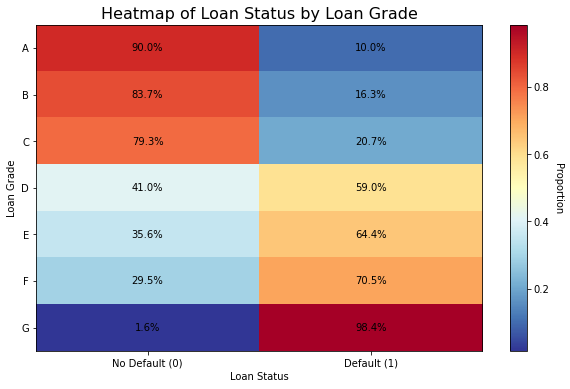

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the heatmap using  imshow
im = ax.imshow(crosstab.values, cmap='RdYlBu_r', aspect='auto')

# Setting the ticks and labels
ax.set_xticks(np.arange(len(crosstab.columns)))
ax.set_yticks(np.arange(len(crosstab.index)))
ax.set_xticklabels(["No Default (0)", "Default (1)"])
ax.set_yticklabels(crosstab.index)

# Adding the annotations
for i in range(len(crosstab.index)):
    for j in range(len(crosstab.columns)):
        text = ax.text(j, i, '{:.1f}%'.format(crosstab.values[i, j]*100),
                       ha="center", va="center", color="black")
        
# Adding color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('Proportion', rotation=-90, va="bottom")

plt.title("Heatmap of Loan Status by Loan Grade", fontsize=16)
plt.xlabel("Loan Status")
plt.ylabel("Loan Grade");